### Assignment 3
#### Rushabh Barbhaya
#### 12/12/21

**Summary** \
Question 1: Accurary is 11.35% \
Question 2: Didn't improve on the model; Accurary = 11.35% \
Question 3: Adding another layer also didn't prove fruitful; Accurary = 11.35%

In [1]:
import numpy
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

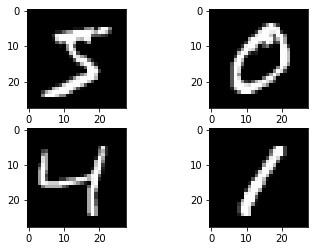

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
num_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train = X_train/255
X_test = X_test/255
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Epoch 1/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1807 - accuracy: 0.0992 - val_loss: 0.1342 - val_accuracy: 0.1009
Epoch 2/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1177 - accuracy: 0.1045 - val_loss: 0.1069 - val_accuracy: 0.1543
Epoch 3/25
300/300 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.1239 - val_loss: 0.0983 - val_accuracy: 0.1135
Epoch 4/25
300/300 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.1124 - val_loss: 0.0946 - val_accuracy: 0.1135
Epoch 5/25
300/300 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.1124 - val_loss: 0.0928 - val_accuracy: 0.1135
Epoch 6/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.1124 - val_loss: 0.0918 - val_accuracy: 0.1135
Epoch 7/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.1124 - val_loss: 0.0912 - val_accuracy: 0.1135
Epoch 

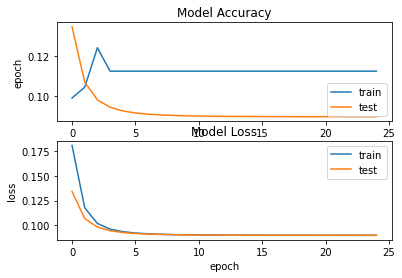

In [4]:
## Question 1
"""
Change the number of neurons in hidden layers to 75. See the accuracy and compared it to the baseline.
"""

hidden_layers = 75

def baseline_model():
    model = Sequential()
    model.add(Dense(hidden_layers, input_dim=num_pixels, kernel_initializer = 'normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer = 'normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = baseline_model()
q1Model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

plt.subplot(211)
plt.plot(q1Model.history['accuracy'])
plt.plot(q1Model.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('accurary')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(q1Model.history['loss'])
plt.plot(q1Model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/35
300/300 [==============================] - 2s 4ms/step - loss: 0.1919 - accuracy: 0.0986 - val_loss: 0.1524 - val_accuracy: 0.0958
Epoch 2/35
300/300 [==============================] - 1s 3ms/step - loss: 0.1332 - accuracy: 0.0986 - val_loss: 0.1193 - val_accuracy: 0.0958
Epoch 3/35
300/300 [==============================] - 1s 4ms/step - loss: 0.1117 - accuracy: 0.0986 - val_loss: 0.1060 - val_accuracy: 0.0963
Epoch 4/35
300/300 [==============================] - 1s 3ms/step - loss: 0.1025 - accuracy: 0.1101 - val_loss: 0.0996 - val_accuracy: 0.1248
Epoch 5/35
300/300 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.1317 - val_loss: 0.0962 - val_accuracy: 0.1287
Epoch 6/35
300/300 [==============================] - 1s 3ms/step - loss: 0.0952 - accuracy: 0.1164 - val_loss: 0.0942 - val_accuracy: 0.1135
Epoch 7/35
300/300 [==============================] - 1s 5ms/step - loss: 0.0936 - accuracy: 0.1124 - val_loss: 0.0930 - val_accuracy: 0.1135
Epoch 

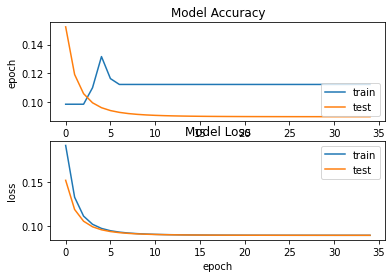

In [5]:
"""
Question 2
Change the number of epochs to 35 and see if it has any effect (50 neurons)
"""

hidden_layers=50

model = baseline_model()
q2Model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

plt.subplot(211)
plt.plot(q2Model.history['accuracy'])
plt.plot(q2Model.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('accurary')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(q2Model.history['loss'])
plt.plot(q2Model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/30
300/300 [==============================] - 2s 4ms/step - loss: 0.2035 - accuracy: 0.1022 - val_loss: 0.1742 - val_accuracy: 0.1010
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1551 - accuracy: 0.1022 - val_loss: 0.1395 - val_accuracy: 0.1010
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1292 - accuracy: 0.1115 - val_loss: 0.1207 - val_accuracy: 0.1135
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1149 - accuracy: 0.1124 - val_loss: 0.1100 - val_accuracy: 0.1135
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.1124 - val_loss: 0.1037 - val_accuracy: 0.1135
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.1124 - val_loss: 0.0997 - val_accuracy: 0.1135
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.1124 - val_loss: 0.0971 - val_accuracy: 0.1135
Epoch 

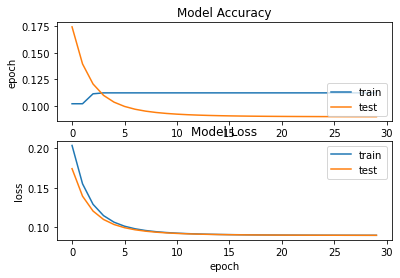

In [6]:
"""
Question 3: Add one more layer to the designed neural network and see the result (This layer contains 25 nodes). Draw graphs and compare accuracies.
"""

hidden_layers = 50
new_hidden_layers = 25 
def baseline_model():
    model = Sequential()
    model.add(Dense(hidden_layers, input_dim=num_pixels, kernel_initializer = 'normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer = 'normal', activation='sigmoid'))
    model.add(Dense(new_hidden_layers, kernel_initializer = 'normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = baseline_model()
q3Model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

plt.subplot(211)
plt.plot(q3Model.history['accuracy'])
plt.plot(q3Model.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('accurary')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(q3Model.history['loss'])
plt.plot(q3Model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()